### Problem C - The League [35 points]

In this football problem, you will work like a data scientist and fill this end-to-end project to answer a question based on real data.

On March 5 2023, Liverpool won a match against Manchester United by 7-0.

In this problem, we will work on how confident should we be that Liverpool is a better team than Manchester United?

In [1]:
# Importing libraries

# Import the pandas library as 'pd'
import pandas as pd

# Import the 'poisson' and 'gamma' functions from 'scipy.stats'
from scipy.stats import poisson
from scipy.stats import gamma

# Import the numpy library as 'np'
import numpy as np

# Import the 'pyplot' module from 'matplotlib' as 'plt'
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('league_tables.csv')
df.head()

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN


**2.1 Preprocess the data to include stats only for Liverpool and Manchester Utd in df. [5 points]**

Removing irrelevant rows and columns is usually a good practice for a data scientist.

In [3]:
df = df[df['Team'].isin(['Liverpool', 'Manchester Utd'])]

In [4]:
df.head()

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
9,1993,Liverpool,6,42,16,11,15,62,55,7,59,NaN
11,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
30,1994,Liverpool,8,42,17,9,16,59,55,4,60,NaN
32,1994,Manchester Utd,1,42,27,11,4,80,38,42,92,→ Champions League via league finish
54,1995,Liverpool,4,42,21,11,10,65,37,28,74,→ UEFA Cup via league finish


Here are two dataframes contain the values for Liverpool and Man Utd only for easier calculations.

In [5]:
liverpool = df[df['Team'].isin(['Liverpool'])]
man_utd = df[df['Team'].isin(['Manchester Utd'])]

**2.2 Calculate the average goal-scoring rate for Liverpool and Manchester United. [5 points]**

In [6]:
#average goal-scoring rate for Liverpool
liv_avg = liverpool["GF"].sum() / liverpool["MP"].sum()
#average goal-scoring rate for Manchester United
man_avg = man_utd["GF"].sum() / man_utd["MP"].sum()

**2.3 Fitting gamma distribution for Liverpool [7 points]**

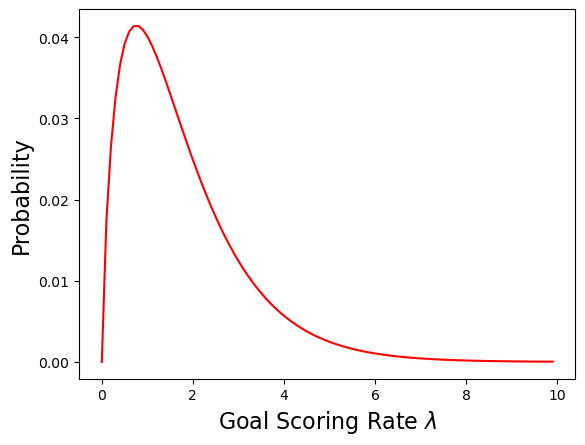

In [7]:
from scipy.stats import gamma

# Calculate the gamma distribution values for Liverpool
liv_gamma = [gamma.pdf(lam, liv_avg) for lam in np.arange(0, 10, .1)]

# Plot the gamma distribution values for Liverpool
plt.plot(np.arange(0, 10, .1), liv_gamma/sum(liv_gamma), color="red")
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

**2.4 Fitting the gamma distribution for Manchester United [7 points]**

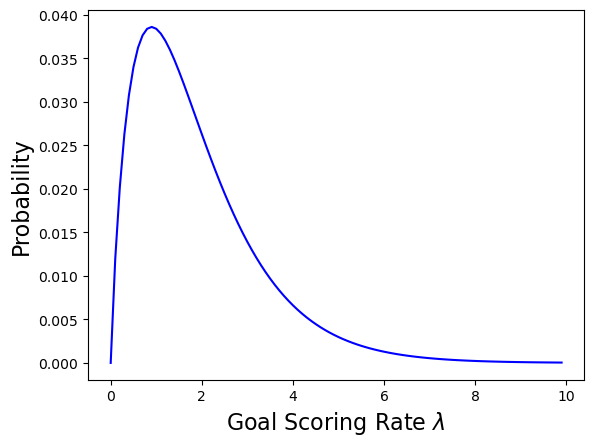

In [8]:
# Calculate the gamma distribution values for Manchester Utd
man_gamma = [gamma.pdf(lam, man_avg) for lam in np.arange(0, 10, .1)]

# Plot the gamma distribution values for Manchester Utd
plt.plot(np.arange(0, 10, .1), man_gamma/sum(man_gamma), color="blue")
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

**2.5 Defining likelihood and update [8 points]**

In [16]:
# Function for poisson likelihood
def likelihood_poisson(lam, data):
    '''Returns the likelihood of seeing k goals for goal scoring rate lambda'''
    return [poisson.pmf(data,l)  for l in lam]

# Bayesian update function
def update(distribution, likelihood):
    '''our standard Bayesian update function'''
    distribution["probs"] = distribution["probs"] * likelihood
    prob_data = distribution["probs"].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

**2.6 Updating for Liverpool [5 points]**

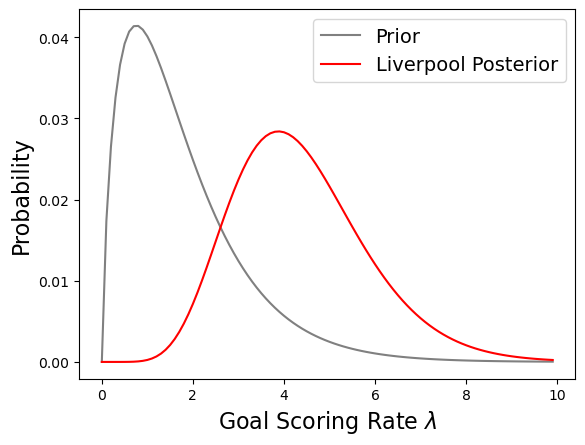

In [17]:
# Creating the prior for Liverpool based on gamma distribution
prior = pd.DataFrame({'lams':np.arange(0, 10, .1),'probs':liv_gamma/sum(liv_gamma)})
liv = prior.copy()
# Update the prior based on new data for Liverpool
update(liv, likelihood_poisson(liv['lams'], 7))

# Plot the updated distribution for Liverpool
plt.plot(prior['lams'], prior['probs'], color="gray")
plt.plot(liv['lams'], liv['probs'], color="red")
plt.legend(['Prior', 'Liverpool Posterior'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

**2.7 Updating for Manchester United [5 points]**

In [23]:
prior = pd.DataFrame({'lams':np.arange(0, 10, .1),'probs':man_gamma/sum(man_gamma)})
man = prior.copy()
#your code here
update(man, likelihood_poisson(man['lams'], 0))

,lams,probs
0,0.0,0.000000e+00
1,0.1,4.045798e-02
2,0.2,6.167076e-02
3,0.3,7.263094e-02
4,0.4,7.696540e-02
...,...,...
95,9.5,1.643219e-08
96,9.6,1.358046e-08
97,9.7,1.122254e-08
98,9.8,9.273132e-09


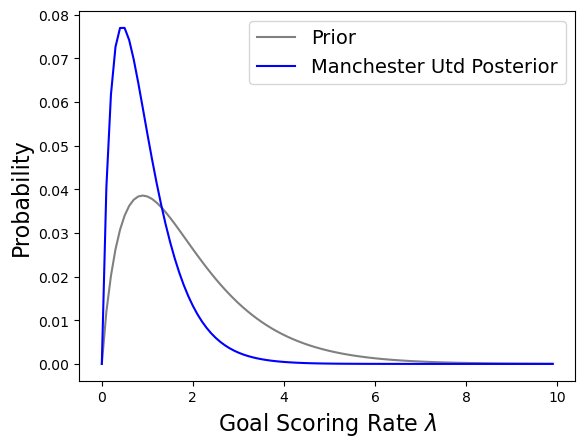

In [24]:
# Plot the updated distribution for Manchester Utd
plt.plot(prior['lams'], prior['probs'], color="gray")
plt.plot(man['lams'], man['probs'], color="blue")
plt.legend(['Prior', 'Manchester Utd Posterior'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

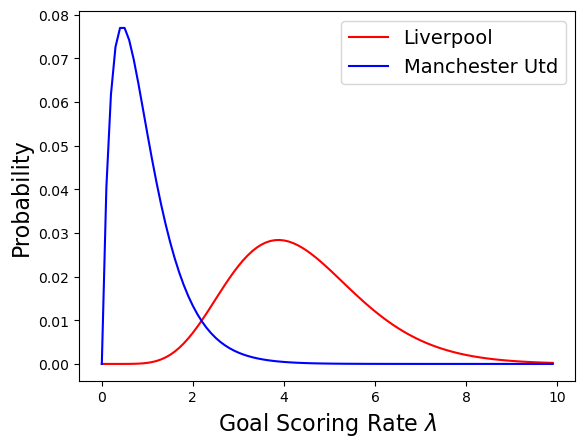

In [25]:
#plotting together
plt.plot(liv['lams'], liv['probs'], color="red")
plt.plot(man['lams'], man['probs'], color="blue")
plt.legend(['Liverpool', 'Manchester Utd'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16);

**2.8 What is the probability that a random value drawn from Liverpool’s distribution exceeds a value drawn from Man Utd’s distribution? [10
points] - BONUS**

In [27]:
# Function to compute the probability of superiority
def prob_of_s(dist1, dist2):
    total = 0
    # Iterate over each row in the first distribution 'dist1'
    for index1, row1 in dist1.iterrows():
        # Iterate over each row in the second distribution 'dist2'
        for index2, row2 in dist2.iterrows():
            # Check if the lambda value of the first row is greater than that of the second row
            if row1['lams'] > row2['lams']:
                # Update the 'total' variable by adding the product of probabilities of both rows
                total += row1['probs'] * row2['probs']
    return total

# Calculate and print the probability of superiority of the 'liv' over the 'man' distributions
# ...
prob_of_s(liv, man)

0.9881552082826744

**2.9 If the same teams played again, what is the chance Liverpool would win again? [8 points] - BONUS**

In [42]:
def make_mixture(pmf_table, probs):
    """Make a mixture of distributions."""
    # Multiply the 'pmf_table' by 'probs', transpose the result, and then sum along the specified axis
    # mix = ...
    mix = (pmf_table.fillna(0).transpose() * probs).sum(axis=1)
    return mix

In [43]:
pmf_table = pd.DataFrame([[poisson.pmf(goals,lam) for goals in range(10)] for lam in prior['lams']])
pmf_table = (pmf_table.T / pmf_table.T.sum()).T
pmf_table

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.904837,0.090484,0.004524,0.000151,0.000004,7.540312e-08,1.256719e-09,1.795312e-11,2.244140e-13,2.493489e-15
2,0.818731,0.163746,0.016375,0.001092,0.000055,2.183282e-06,7.277607e-08,2.079316e-09,5.198290e-11,1.155176e-12
3,0.740818,0.222245,0.033337,0.003334,0.000250,1.500157e-05,7.500784e-07,3.214622e-08,1.205483e-09,4.018277e-11
4,0.670320,0.268128,0.053626,0.007150,0.000715,5.720064e-05,3.813376e-06,2.179072e-07,1.089536e-08,4.842383e-10
...,...,...,...,...,...,...,...,...,...,...
95,0.000143,0.001363,0.006473,0.020497,0.048681,9.249398e-02,1.464488e-01,1.987519e-01,2.360179e-01,2.491300e-01
96,0.000133,0.001278,0.006133,0.019626,0.047103,9.043735e-02,1.446998e-01,1.984454e-01,2.381345e-01,2.540101e-01
97,0.000124,0.001199,0.005813,0.018795,0.045578,8.842148e-02,1.429481e-01,1.980852e-01,2.401783e-01,2.588588e-01
98,0.000115,0.001125,0.005511,0.018002,0.044105,8.644639e-02,1.411958e-01,1.976741e-01,2.421507e-01,2.636753e-01


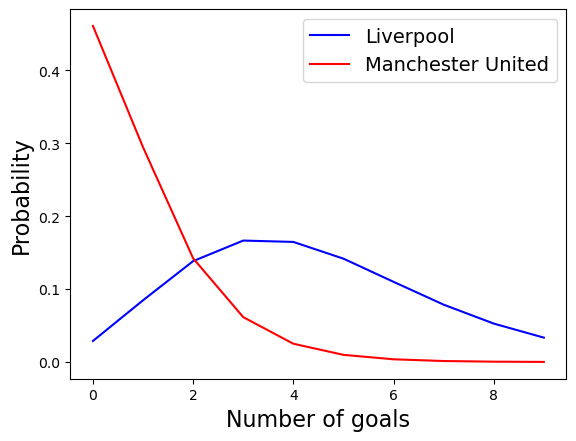

In [44]:
pred_liv=make_mixture(pmf_table,liv['probs'])
pred_man=make_mixture(pmf_table,man['probs'])
plt.plot(range(10), pred_liv, color="blue")
plt.plot(range(10),pred_man, color="red")
plt.legend(['Liverpool', 'Manchester United'], fontsize = 14, loc = 'best')
plt.xlabel('Number of goals', size = 16)
plt.ylabel('Probability', size = 16);

In [ ]:
### Problem 2 - The League [60 points]

In this football problem, you will work like a data scientist and fill this end-to-end project to answer a question based on real data.

On March 5 2023, Liverpool won a match against Manchester United by 7-0.

In this problem, we will work on how confident should we be that Liverpool is a better team than Manchester United?

# Importing libraries

# Import the pandas library as 'pd'
import ______ as __

# Import the 'poisson' and 'gamma' functions from 'scipy.stats'
from scipy.______ import ______
from scipy.______ import ______

# Import the numpy library as 'np'
import ______ as __

# Import the 'pyplot' module from 'matplotlib' as 'plt'
from ______ import ______ as __


df = pd.read_csv('league_tables.csv')
df.head()

**2.1 Preprocess the data to include stats only for Liverpool and Manchester Utd in df. [5 points]**

Removing irrelevant rows and columns is usually a good practice for a data scientist.

df = df[df['Team'].isin(['Liverpool', 'Manchester Utd'])]

df.head()

Here are two dataframes contain the values for Liverpool and Man Utd only for easier calculations.

liverpool = df[df['Team'].isin(['Liverpool'])]
man_utd = df[df['Team'].isin(['Manchester Utd'])]

**2.2 Calculate the average goal-scoring rate for Liverpool and Manchester United. [5 points]**

#average goal-scoring rate for Liverpool
liv_avg = liverpool["GF"].sum() / liverpool["MP"].sum()
#average goal-scoring rate for Manchester United
man_avg = #your code here

**2.3 Fitting gamma distribution for Liverpool [7 points]**

from scipy.stats import gamma

# Calculate the gamma distribution values for Liverpool
liv_gamma = [gamma.____(____, liv_avg) for lam in np.____(0, 10, .1)]

# Plot the gamma distribution values for Liverpool
plt.plot(np.arange(0, 10, .1), liv_gamma/sum(liv_gamma), color="red")
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

**2.4 Fitting the gamma distribution for Manchester United [7 points]**

# Calculate the gamma distribution values for Manchester Utd
# man_gamma = 

# Plot the gamma distribution values for Manchester Utd
plt.plot(np.arange(0, 10, .1), man_gamma/sum(man_gamma), color="blue")
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

**2.5 Defining likelihood and update [8 points]**

# Function for poisson likelihood
def likelihood_poisson(lam, data):
    '''Returns the likelihood of seeing k goals for goal scoring rate lambda'''
    return [poisson.____(data, _)  for l in lam]

# Bayesian update function
def update(distribution, likelihood):
    '''our standard Bayesian update function'''
    distribution[____] = distribution[____] * likelihood
    prob_data = distribution[____].____()
    distribution[____] = distribution[____] / prob_data
    return distribution

**2.6 Updating for Liverpool [5 points]**

# Creating the prior for Liverpool based on gamma distribution
prior = pd.DataFrame({'lams':np.arange(0, 10, .1),'probs':liv_gamma/sum(liv_gamma)})
liv = prior.copy()

# Update the prior based on new data for Liverpool
update(liv, likelihood_poisson(liv[____], 7))

# Plot the updated distribution for Liverpool
plt.plot(prior[____], prior[____], color="gray")
plt.plot(liv[____], liv[____], color="red")
plt.legend(['Prior', 'Liverpool Posterior'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

**2.7 Updating for Manchester United [5 points]**

prior = pd.DataFrame({'lams':np.arange(0, 10, .1),'probs':man_gamma/sum(man_gamma)})
man = prior.copy()
#your code here


# Plot the updated distribution for Manchester Utd
plt.plot(prior[____], prior[____], color="gray")
plt.plot(man[____], man[____], color="blue")
plt.legend(['Prior', 'Manchester Utd Posterior'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16)
plt.show()

#plotting together
plt.plot(liv['lams'], liv['probs'], color="red")
plt.plot(man['lams'], man['probs'], color="blue")
plt.legend(['Liverpool', 'Manchester Utd'], fontsize = 14, loc = 'best')
plt.xlabel('Goal Scoring Rate $\lambda$', size = 16)
plt.ylabel('Probability', size = 16);

**2.8 What is the probability that a random value drawn from Liverpool’s distribution exceeds a value drawn from Man Utd’s distribution? [10
points] - BONUS**

# Function to compute the probability of superiority
def prob_of_s(dist1, dist2):
    total = 0
    # Iterate over each row in the first distribution 'dist1'
    for index1, row1 in dist1.____():
        # Iterate over each row in the second distribution 'dist2'
        for index2, row2 in dist2.____():
            # Check if the lambda value of the first row is greater than that of the second row
            if row1[____] > row2[____]:
                # Update the 'total' variable by adding the product of probabilities of both rows
                total += row1[____] * row2[____]
    return total

# Calculate and print the probability of superiority of the 'liv' over the 'man' distributions
# ...
prob_of_s(____, ____)

**2.9 If the same teams played again, what is the chance Liverpool would win again? [8 points] - BONUS**

def make_mixture(pmf_table, probs):
    """Make a mixture of distributions."""
    # Multiply the 'pmf_table' by 'probs', transpose the result, and then sum along the specified axis
    # mix = ...
    mix = (pmf_table.____().____() * probs).____(axis=_)
    return mix

pmf_table = pd.DataFrame([[poisson.pmf(goals,lam) for goals in range(10)] for lam in prior['lams']])
pmf_table = (pmf_table.T / pmf_table.T.sum()).T
pmf_table

pred_liv=make_mixture(pmf_table,liv['probs'])
pred_man=make_mixture(pmf_table,man['probs'])
plt.plot(range(10), pred_liv, color="blue")
plt.plot(range(10),pred_man, color="red")
plt.legend(['Liverpool', 'Manchester United'], fontsize = 14, loc = 'best')
plt.xlabel('Number of goals', size = 16)
plt.ylabel('Probability', size = 16);